In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU (this may not be needed on your computer)

In [2]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0


In [3]:
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if len(gpu_devices)>0:
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
print(gpu_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### load packages

In [4]:
from tfumap.umap import tfUMAP

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import umap
import pandas as pd

### Load dataset

In [6]:
dataset = 'fmnist'
dims = (28,28,1)

In [7]:
from tensorflow.keras.datasets import fashion_mnist

In [8]:
# load dataset
(train_images, Y_train), (test_images, Y_test) = fashion_mnist.load_data()
X_train = (train_images/255.).astype('float32')
X_test = (test_images/255.).astype('float32')
X_train = X_train.reshape((len(X_train), np.product(np.shape(X_train)[1:])))
X_test = X_test.reshape((len(X_test), np.product(np.shape(X_test)[1:])))

# subset a validation set
n_valid = 10000
X_valid = X_train[-n_valid:]
Y_valid = Y_train[-n_valid:]
X_train = X_train[:-n_valid]
Y_train = Y_train[:-n_valid]

# flatten X
X_train_flat = X_train.reshape((len(X_train), np.product(np.shape(X_train)[1:])))
X_test_flat = X_test.reshape((len(X_test), np.product(np.shape(X_test)[1:])))
X_valid_flat= X_valid.reshape((len(X_valid), np.product(np.shape(X_valid)[1:])))
print(len(X_train), len(X_valid), len(X_test))

50000 10000 10000


### define networks

In [9]:
dims = (28,28,1)
n_components = 2

In [10]:
encoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=dims),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu"
    ),
    tf.keras.layers.Conv2D(
        filters=128, kernel_size=3, strides=(2, 2), activation="relu"
    ),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(units=n_components),
])

### Create model and train

In [11]:
batch_size = 5000

In [12]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

In [13]:
from tfumap.parametric_tsne import compute_joint_probabilities, tsne_loss

In [14]:
save_loc = DATA_DIR/ 'parametric_tsne'/ dataset / 'P.npy'
if save_loc.exists():
    P = np.load(save_loc)
else:
    P = compute_joint_probabilities(X_train_flat, batch_size=batch_size, perplexity=30, verbose=2)
    ensure_dir(save_loc)
    np.save(save_loc, P)

Precomputing P-values...


Computing pairwise distances...
Computing P-values...
Computed P-values 0 of 5000 datapoints...
Computed P-values 500 of 5000 datapoints...
Computed P-values 1000 of 5000 datapoints...
Computed P-values 1500 of 5000 datapoints...
Computed P-values 2000 of 5000 datapoints...
Computed P-values 2500 of 5000 datapoints...
Computed P-values 3000 of 5000 datapoints...
Computed P-values 3500 of 5000 datapoints...
Computed P-values 4000 of 5000 datapoints...
Computed P-values 4500 of 5000 datapoints...
Mean value of sigma: 1.9265290912282516
Minimum value of sigma: 1.1206479524805308
Maximum value of sigma: 3.684281631266809
Computing pairwise distances...
Computing P-values...
Computed P-values 0 of 5000 datapoints...
Computed P-values 500 of 5000 datapoints...
Computed P-values 1000 of 5000 datapoints...
Computed P-values 1500 of 5000 datapoints...
Computed P-values 2000 of 5000 datapoints...
Computed P-values 2500 of 5000 datapoints...
Computed P-values 3000 of 5000 datapoints...
Computed P

/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/tfumap/parametric_tsne.py:17: RuntimeWarning: divide by zero encountered in log
  H = np.log(sumP) + beta * np.sum(np.multiply(D, P)) / sumP
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/tfumap/parametric_tsne.py:17: RuntimeWarning: invalid value encountered in double_scalars
  H = np.log(sumP) + beta * np.sum(np.multiply(D, P)) / sumP
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/tfumap/parametric_tsne.py:18: RuntimeWarning: invalid value encountered in true_divide
  P = P / sumP


Computed P-values 3500 of 5000 datapoints...
Computed P-values 4000 of 5000 datapoints...
Computed P-values 4500 of 5000 datapoints...
Mean value of sigma: 1.923113501811673
Minimum value of sigma: 0.9870274967406606
Maximum value of sigma: 3.925706293147615
Computing pairwise distances...
Computing P-values...
Computed P-values 0 of 5000 datapoints...
Computed P-values 500 of 5000 datapoints...
Computed P-values 1000 of 5000 datapoints...
Computed P-values 1500 of 5000 datapoints...
Computed P-values 2000 of 5000 datapoints...
Computed P-values 2500 of 5000 datapoints...
Computed P-values 3000 of 5000 datapoints...
Computed P-values 3500 of 5000 datapoints...
Computed P-values 4000 of 5000 datapoints...
Computed P-values 4500 of 5000 datapoints...
Mean value of sigma: 1.918882824716907
Minimum value of sigma: 1.0
Maximum value of sigma: 4.235022224942636
Computing pairwise distances...
Computing P-values...
Computed P-values 0 of 5000 datapoints...
Computed P-values 500 of 5000 datapo

In [15]:
# Joint probabilities of data
Y_train_tsne = P.reshape(X_train.shape[0], -1)

In [16]:
opt = tf.keras.optimizers.Adam(lr=0.01)

In [17]:
encoder.compile(loss=tsne_loss(d=n_components, batch_size=batch_size), optimizer=opt)

In [18]:
X_train = np.reshape(X_train, ([len(X_train)]+ list(dims)))
X_test = np.reshape(X_test, ([len(X_test)]+ list(dims)))

In [19]:
# because shuffle == False, the same batches are used each time...
history = encoder.fit(X_train, Y_train_tsne, batch_size=batch_size, shuffle=False, nb_epoch=1000)

W0720 10:02:31.637498 140307082995520 training.py:792] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 50000 samples
Epoch 1/1000
50000/50000 [==============================] - 10s 195us/sample - loss: 3.0564
Epoch 2/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 2.3870
Epoch 3/1000
50000/50000 [==============================] - 1s 14us/sample - loss: 2.1792
Epoch 4/1000
50000/50000 [==============================] - 1s 14us/sample - loss: 2.0646
Epoch 5/1000
50000/50000 [==============================] - 1s 14us/sample - loss: 1.9805
Epoch 6/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.9280
Epoch 7/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.8900
Epoch 8/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.8608
Epoch 9/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.8438
Epoch 10/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.8312
Epoch 11/1000
50000/50000 [==============================] - 1s 15us/sampl

50000/50000 [==============================] - 1s 21us/sample - loss: 1.5535
Epoch 91/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.5464
Epoch 92/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.5481
Epoch 93/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.5449
Epoch 94/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.5370
Epoch 95/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.5344
Epoch 96/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.5303
Epoch 97/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.5309
Epoch 98/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.5231
Epoch 99/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.5145
Epoch 100/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.5169
Epoch 101/10

50000/50000 [==============================] - 1s 16us/sample - loss: 1.4913
Epoch 180/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.4915
Epoch 181/1000
50000/50000 [==============================] - 1s 17us/sample - loss: 1.4910
Epoch 182/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.4967
Epoch 183/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.4992
Epoch 184/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.4930
Epoch 185/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.4902
Epoch 186/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.4924
Epoch 187/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.4996
Epoch 188/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.5149
Epoch 189/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.5217
Epo

50000/50000 [==============================] - 1s 15us/sample - loss: 1.4383
Epoch 269/1000
50000/50000 [==============================] - 1s 18us/sample - loss: 1.4410
Epoch 270/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.4425
Epoch 271/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.4452
Epoch 272/1000
50000/50000 [==============================] - 1s 17us/sample - loss: 1.4433
Epoch 273/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.4396
Epoch 274/1000
50000/50000 [==============================] - 1s 14us/sample - loss: 1.4301
Epoch 275/1000
50000/50000 [==============================] - 1s 19us/sample - loss: 1.4252
Epoch 276/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.4187
Epoch 277/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.4196
Epoch 278/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.4129
Epo

50000/50000 [==============================] - 1s 16us/sample - loss: 1.3572
Epoch 358/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3622
Epoch 359/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3648
Epoch 360/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3673
Epoch 361/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3670
Epoch 362/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3679
Epoch 363/1000
50000/50000 [==============================] - 1s 14us/sample - loss: 1.3690
Epoch 364/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3723
Epoch 365/1000
50000/50000 [==============================] - 1s 14us/sample - loss: 1.3761
Epoch 366/1000
50000/50000 [==============================] - 1s 14us/sample - loss: 1.3748
Epoch 367/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3729
Epo

50000/50000 [==============================] - 1s 15us/sample - loss: 1.3544
Epoch 447/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3540
Epoch 448/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3518
Epoch 449/1000
50000/50000 [==============================] - 1s 18us/sample - loss: 1.3543
Epoch 450/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3559
Epoch 451/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3573
Epoch 452/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3597
Epoch 453/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3638
Epoch 454/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3658
Epoch 455/1000
50000/50000 [==============================] - 1s 17us/sample - loss: 1.3637
Epoch 456/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3610
Epo

50000/50000 [==============================] - 1s 16us/sample - loss: 1.3470
Epoch 536/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3517
Epoch 537/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3565
Epoch 538/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3639
Epoch 539/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3731
Epoch 540/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3842
Epoch 541/1000
50000/50000 [==============================] - 1s 17us/sample - loss: 1.3796
Epoch 542/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3766
Epoch 543/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3765
Epoch 544/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3775
Epoch 545/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3815
Epo

50000/50000 [==============================] - 1s 15us/sample - loss: 1.3237
Epoch 625/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3255
Epoch 626/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3236
Epoch 627/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3215
Epoch 628/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3200
Epoch 629/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3186
Epoch 630/1000
50000/50000 [==============================] - 1s 18us/sample - loss: 1.3156
Epoch 631/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3137
Epoch 632/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3151
Epoch 633/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3149
Epoch 634/1000
50000/50000 [==============================] - 1s 17us/sample - loss: 1.3172
Epo

50000/50000 [==============================] - 1s 15us/sample - loss: 1.3163
Epoch 714/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3159
Epoch 715/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3152
Epoch 716/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3146
Epoch 717/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3143
Epoch 718/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3130
Epoch 719/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3142
Epoch 720/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3151
Epoch 721/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3138
Epoch 722/1000
50000/50000 [==============================] - 1s 17us/sample - loss: 1.3149
Epoch 723/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3099
Epo

50000/50000 [==============================] - 1s 15us/sample - loss: 1.3253
Epoch 803/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3288
Epoch 804/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3311
Epoch 805/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3312
Epoch 806/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3334
Epoch 807/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3357
Epoch 808/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3373
Epoch 809/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3356
Epoch 810/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3334
Epoch 811/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3356
Epoch 812/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3344
Epo

50000/50000 [==============================] - 1s 15us/sample - loss: 1.3219
Epoch 892/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3183
Epoch 893/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3168
Epoch 894/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3159
Epoch 895/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3130
Epoch 896/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3118
Epoch 897/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3083
Epoch 898/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3134
Epoch 899/1000
50000/50000 [==============================] - 1s 14us/sample - loss: 1.3184
Epoch 900/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3244
Epoch 901/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3242
Epo

50000/50000 [==============================] - 1s 15us/sample - loss: 1.3065
Epoch 981/1000
50000/50000 [==============================] - 1s 14us/sample - loss: 1.3103
Epoch 982/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3123
Epoch 983/1000
50000/50000 [==============================] - 1s 18us/sample - loss: 1.3146
Epoch 984/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3128
Epoch 985/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3104
Epoch 986/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3117
Epoch 987/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3132
Epoch 988/1000
50000/50000 [==============================] - 1s 15us/sample - loss: 1.3179
Epoch 989/1000
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3210
Epoch 990/1000
50000/50000 [==============================] - 1s 17us/sample - loss: 1.3278
Epo

### get z for training and test

In [20]:
z = encoder.predict(X_train)
z_test = encoder.predict(X_test)

### Test plot

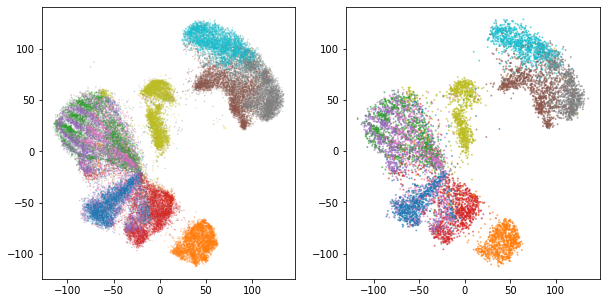

In [21]:
fig, axs = plt.subplots(ncols = 2, figsize=(10, 5))
axs[0].scatter(z[:, 0], z[:, 1], s=0.1, alpha=0.5, c=Y_train, cmap=plt.cm.tab10)
axs[1].scatter(z_test[:, 0], z_test[:, 1], s=1, alpha=0.5, c=Y_test, cmap=plt.cm.tab10)

### Save models + projections

In [22]:
import os

In [23]:
output_dir = MODEL_DIR/'projections'/ dataset / 'parametric-tsne'

In [24]:
encoder.save(os.path.join(output_dir, "encoder"))

W0720 10:15:55.316939 140307082995520 deprecation.py:506] From /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
I0720 10:15:55.584639 140307082995520 builder_impl.py:775] Assets written to: /mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/fmnist/parametric-tsne/encoder/assets


In [25]:
np.save(output_dir / 'z.npy', z)
np.save(output_dir / 'z_test.npy', z_test)

### compute metrics

#### silhouette

In [26]:
from tfumap.silhouette import silhouette_score_block

In [27]:
ss, sil_samp = silhouette_score_block(z, Y_train, n_jobs = -1)
ss

0.20130309026995896

In [28]:
ss_test, sil_samp_test = silhouette_score_block(z_test, Y_test, n_jobs = -1)
ss_test

0.19764311907288773

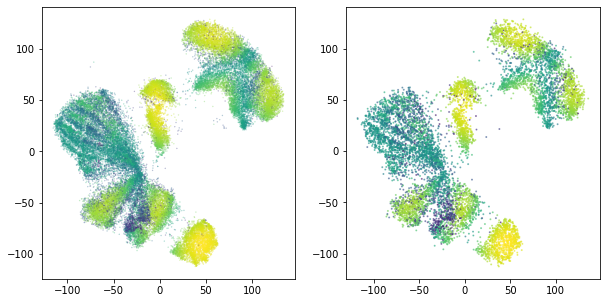

In [29]:
fig, axs = plt.subplots(ncols = 2, figsize=(10, 5))
axs[0].scatter(z[:, 0], z[:, 1], s=0.1, alpha=0.5, c=sil_samp, cmap=plt.cm.viridis)
axs[1].scatter(z_test[:, 0], z_test[:, 1], s=1, alpha=0.5, c=sil_samp_test, cmap=plt.cm.viridis)

#### KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(z, Y_train)
score_5nn = neigh5.score(z_test, Y_test)
score_5nn

0.7361

In [32]:
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(z, Y_train)
score_1nn = neigh1.score(z_test, Y_test)
score_1nn

0.6834

#### Trustworthiness

In [33]:
from sklearn.manifold import trustworthiness

In [34]:
tw = trustworthiness(X_train_flat[:10000], z[:10000])

In [35]:
tw_test = trustworthiness(X_test_flat[:10000], z_test[:10000])

In [36]:
tw, tw_test

(0.982720292233787, 0.9696814091273018)

#### save output metrics

In [37]:
metrics_df = pd.DataFrame(
    columns=[
        "dataset",
        "class_",
        "dim",
        "trustworthiness",
        "silhouette_score",
        "silhouette_samples",
    ]
)
metrics_df.loc[len(metrics_df)] = [dataset, 'parametric-tsne', n_components, tw, ss, sil_samp]
metrics_df

,dataset,class_,dim,trustworthiness,silhouette_score,silhouette_samples
0,fmnist,parametric-tsne,2,0.98272,0.201303,"[0.6231377233668559, 0.4950800214069023, -0.27..."


In [38]:
save_loc = DATA_DIR / 'projection_metrics' / 'train' / str(n_components) / (dataset + '.pickle')
ensure_dir(save_loc)
metrics_df.to_pickle(save_loc)

In [39]:
metrics_df_test = pd.DataFrame(
    columns=[
        "dataset",
        "class_",
        "dim",
        "trustworthiness",
        "silhouette_score",
        "silhouette_samples",
    ]
)
metrics_df_test.loc[len(metrics_df)] = [dataset, 'parametric-tsne', n_components, tw_test, ss_test, sil_samp_test]
metrics_df_test

,dataset,class_,dim,trustworthiness,silhouette_score,silhouette_samples
1,fmnist,parametric-tsne,2,0.969681,0.197643,"[0.23866260664031524, 0.11933790594992869, 0.6..."


In [40]:
save_loc = DATA_DIR / 'projection_metrics' / 'test' / str(n_components) / (dataset + '.pickle')
ensure_dir(save_loc)
metrics_df.to_pickle(save_loc)

In [41]:
nn_acc_df = pd.DataFrame(columns = ["method_","dimensions","dataset","1NN_acc","5NN_acc"])
nn_acc_df.loc[len(nn_acc_df)] = ['parametric-tsne', n_components, dataset,  score_1nn, score_5nn]
nn_acc_df

,method_,dimensions,dataset,1NN_acc,5NN_acc
0,parametric-tsne,2,fmnist,0.6834,0.7361


In [42]:
save_loc = DATA_DIR / 'knn_classifier' / str(n_components) / (dataset + '.pickle')
ensure_dir(save_loc)
nn_acc_df.to_pickle(save_loc)